In [1]:
# Data handling libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data transformation Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

# Machine Learning Model Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Data Evaluation Libraries
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, classification_report

#Filter Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data into dataframe
df = pd.read_csv('heart.csv')

# Data Understanding

In [3]:
# Displaying first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Displaying the last 5 rows
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# Features in the dataset

1. age : age in years
2. sex : sex (1=male; 0=female)
3. cp : chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
4. trestbps : resting blood pressure (in mm Hg on admission to the hospital)
5. chol : serum cholestoral in mg/dl
6. fbs : (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg : resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach :  maximum heart rate achieved
9. exang : exercise induced angina (1 = yes; 0 = no)
10. oldpeak : ST depression induced by exercise relative to rest
11. slope : the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
12. ca : number of major vessels (0-3) colored by flourosopy
13. thal : 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target : yes or no (1=yes; 0=no)

In [5]:
# Number of rows and columns
df.shape

(1025, 14)

In [6]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# Datatypes of variables
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

1. All columns are numerical. 13 columns are integer and 1 column is float.

In [8]:
# Different columns in the dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Data Preprocessing

In [9]:
# Check for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### *There are no missing values

In [10]:
# Check for duplicate values
df.duplicated().sum()

723

#### *There are 723 duplicates values. We can delete them

In [11]:
# Dropping the duplicated values
df.drop_duplicates(inplace=True)

In [12]:
# Check for duplicate values
df.duplicated().sum()

0

In [13]:
# After droping duplicate values, check the shape
df.shape

(302, 14)

## Univariate Analysis

age
Skew : -0.2
Kurtosis -0.5275122997069857
IQR 13.0


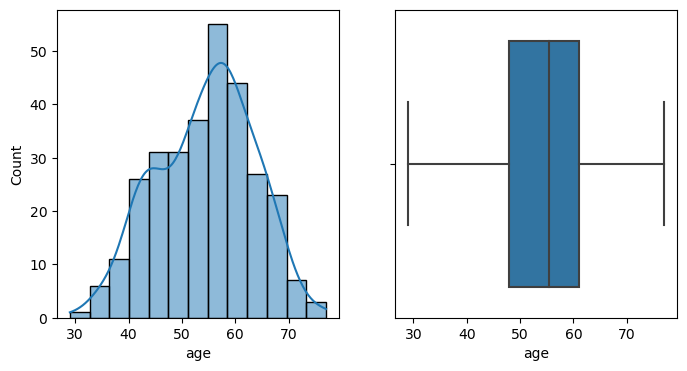

sex
Skew : -0.79
Kurtosis -1.3912730609583188
IQR 1.0


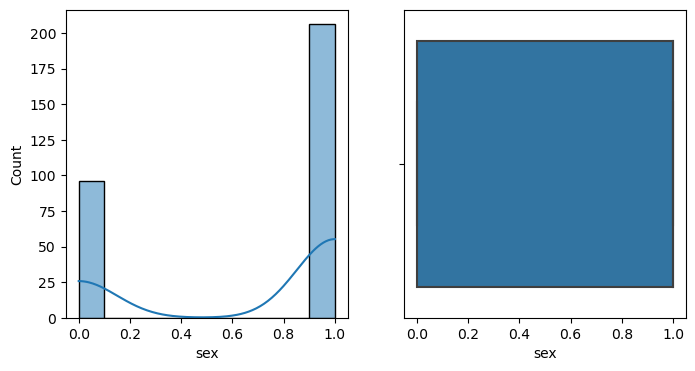

cp
Skew : 0.49
Kurtosis -1.1837292153374055
IQR 2.0


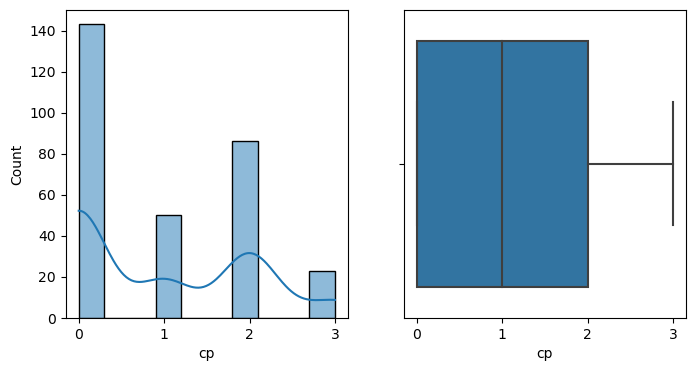

trestbps
Skew : 0.72
Kurtosis 0.9229963552001497
IQR 20.0


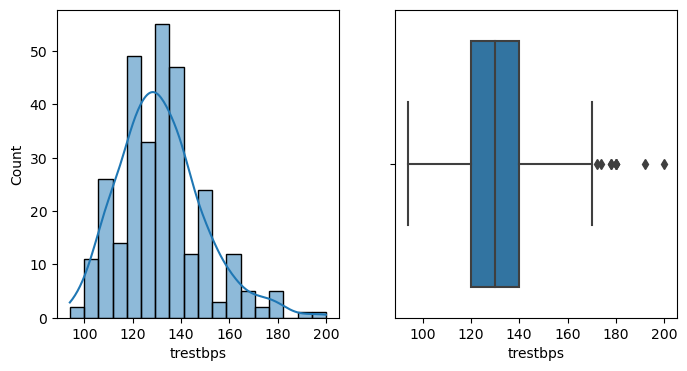

chol
Skew : 1.15
Kurtosis 4.542591352463679
IQR 63.75


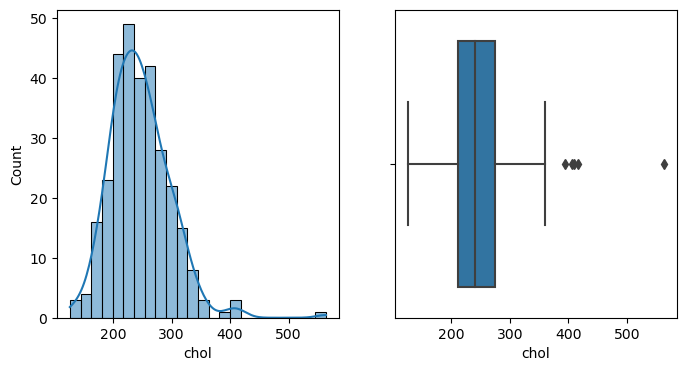

fbs
Skew : 1.98
Kurtosis 1.937947196809655
IQR 0.0


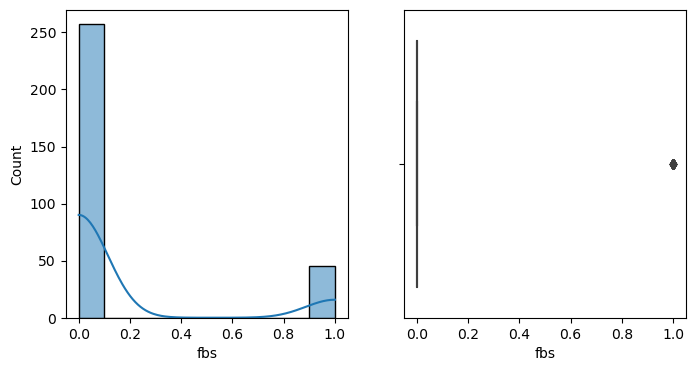

restecg
Skew : 0.17
Kurtosis -1.3594641004045322
IQR 1.0


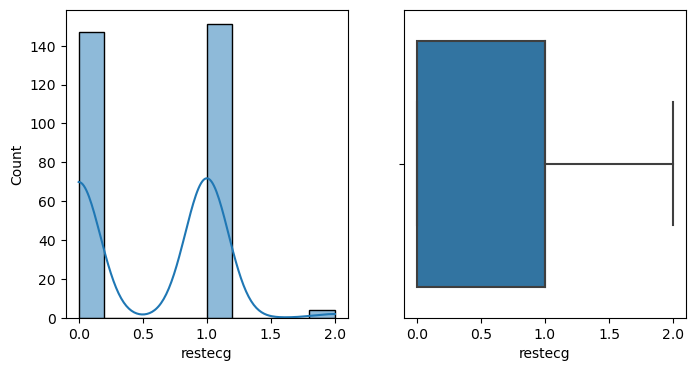

thalach
Skew : -0.53
Kurtosis -0.062186318831145115
IQR 32.75


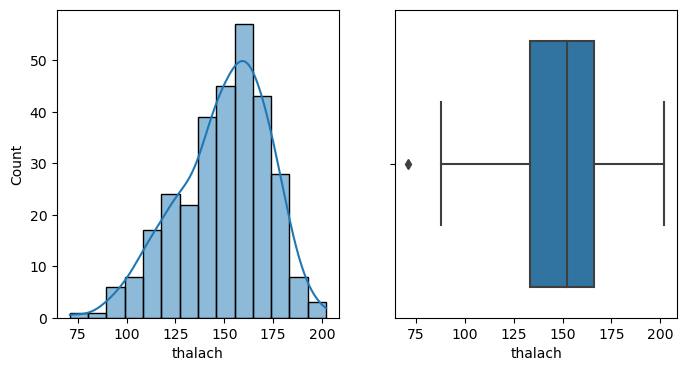

exang
Skew : 0.74
Kurtosis -1.4661703181043508
IQR 1.0


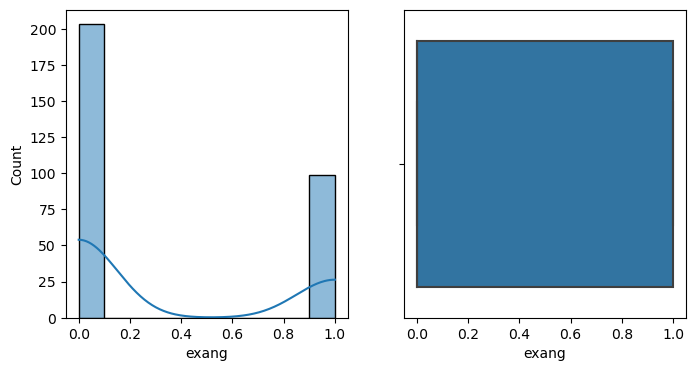

oldpeak
Skew : 1.27
Kurtosis 1.5678764941867342
IQR 1.6


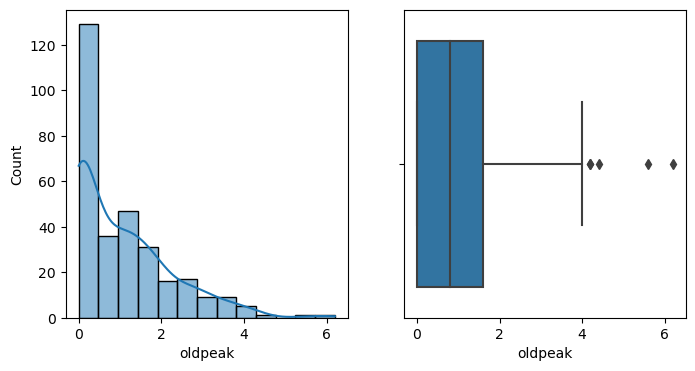

slope
Skew : -0.5
Kurtosis -0.6299346735058267
IQR 1.0


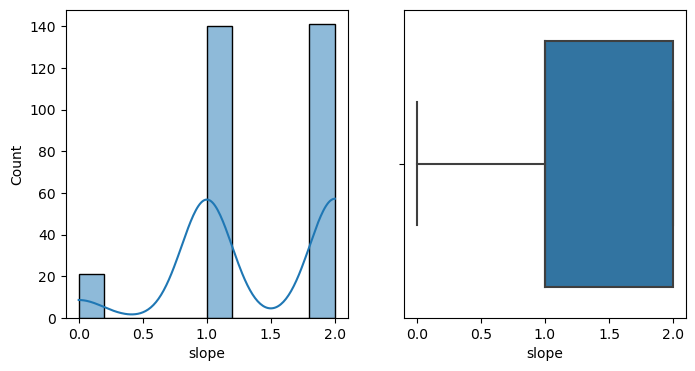

ca
Skew : 1.3
Kurtosis 0.781003295709771
IQR 1.0


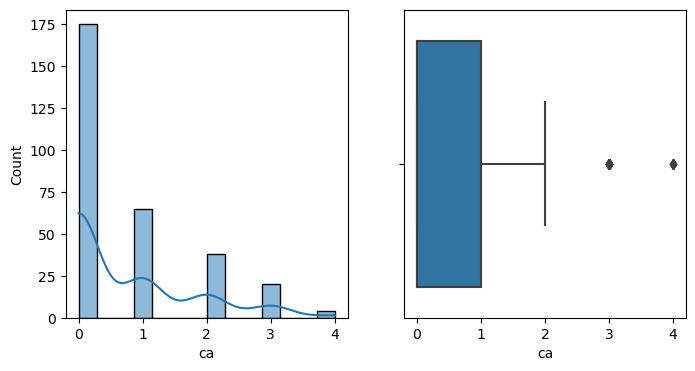

thal
Skew : -0.48
Kurtosis 0.2958547127549438
IQR 1.0


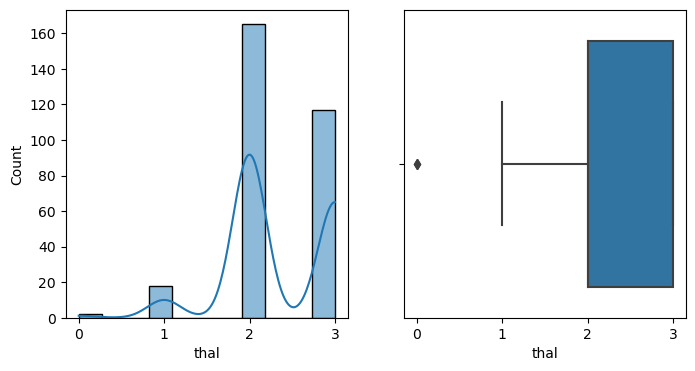

target
Skew : -0.17
Kurtosis -1.9830082305694372
IQR 1.0


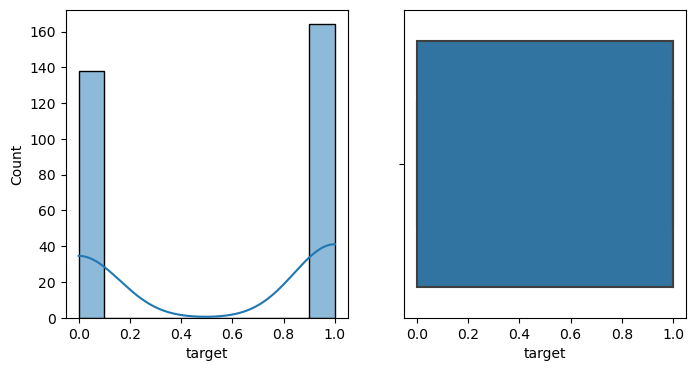

In [14]:
# Check for data distribution and outliers
for col in df.columns:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    print('Kurtosis', df[col].kurt())
    print('IQR', df[col].quantile(0.75) - df[col].quantile(0.25))
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    sns.histplot(x=df[col], kde='True')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    
    plt.show()

In [15]:
df.sort_values(by=['chol'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
101,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
32,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
81,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1


##### There can be extreme values for tresbps, chol, oldpeak, we will not treat them. We keep it as it is.

# Exploratory Data Analysis

In [16]:
#Check for unique values
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [17]:
# Count of target values
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

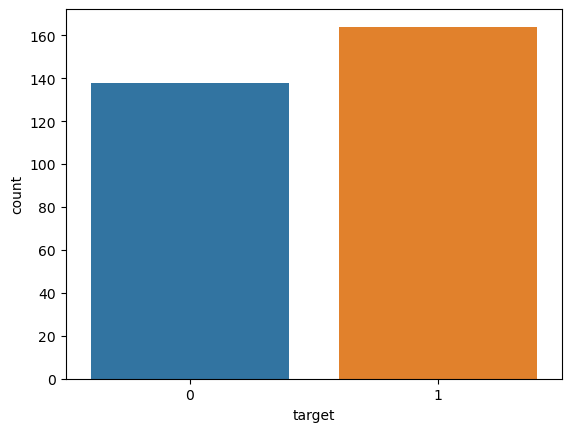

In [18]:
sns.countplot(data=df, x='target')

In [19]:
# Count of unique values
df['cp'].value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

In [20]:
df['fbs'].value_counts()

0    257
1     45
Name: fbs, dtype: int64

In [21]:
df['thal'].value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

In [22]:
# Descrivtive statistics for numerical values
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Statistical Insights
1. Age eranges from 29 - 77
2. Rsting blood sugar is in the range 94 - 200
3. Serum cholestoral is in the range 126 - 564
4. thalach is in range 71 - 202

## Multivariate Analysis

<Axes: >

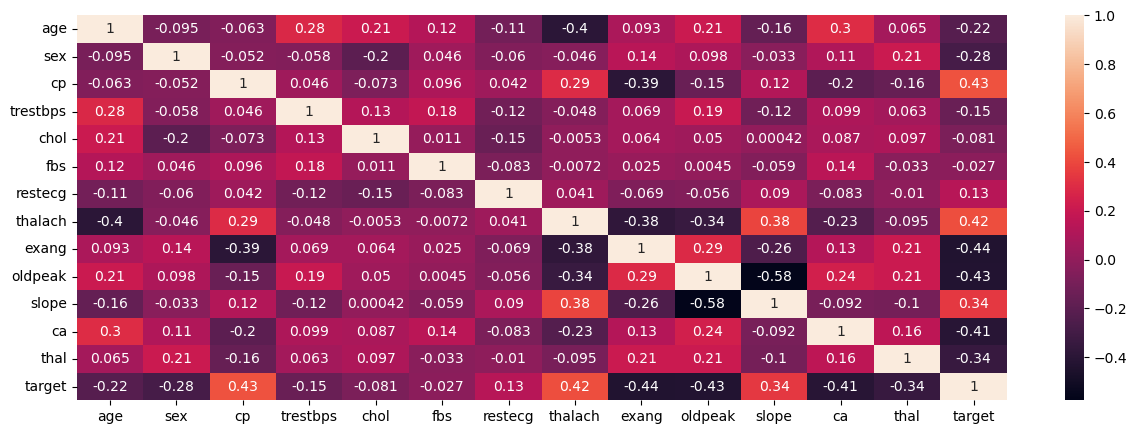

In [23]:
# check correlation between variables
corr = df.corr()
f, ax = plt.subplots(figsize=(15,5))
sns.heatmap(corr, annot=True)

#### Some of the variables are moderately correlated

## Bivariate Analysis

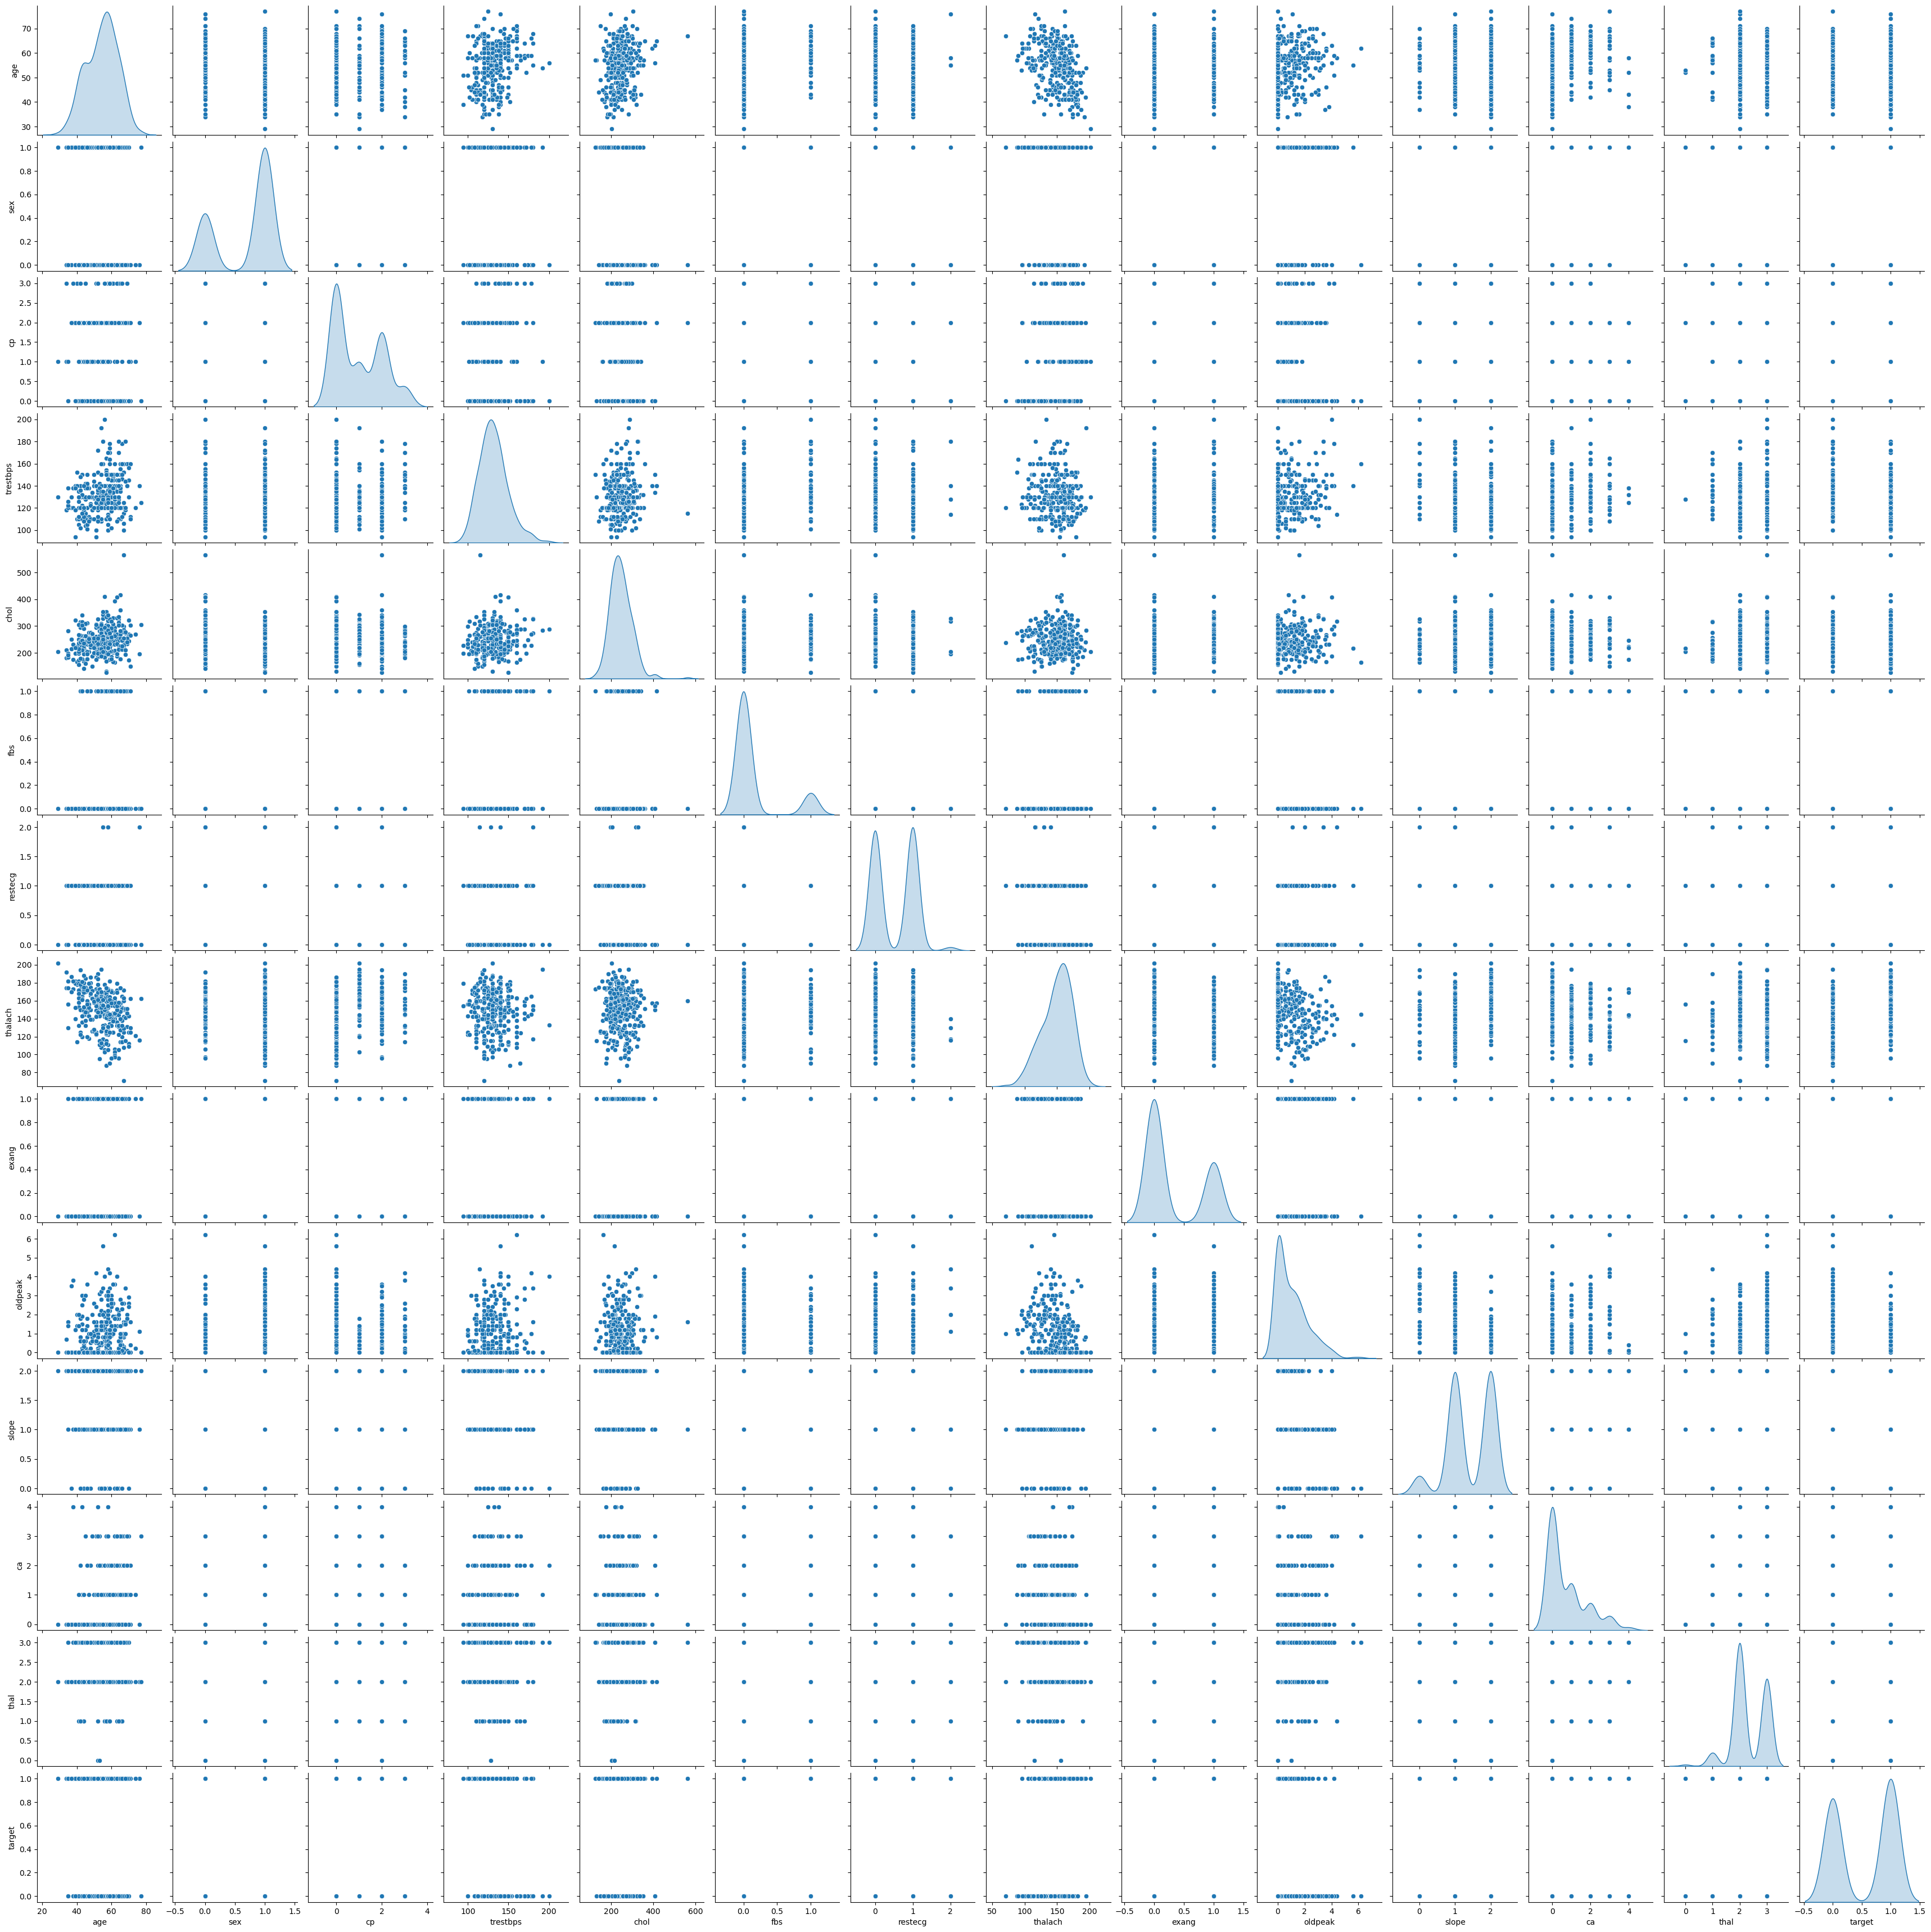

In [24]:
# Relation between two variables
sns.pairplot(data=df, diag_kind='kde')

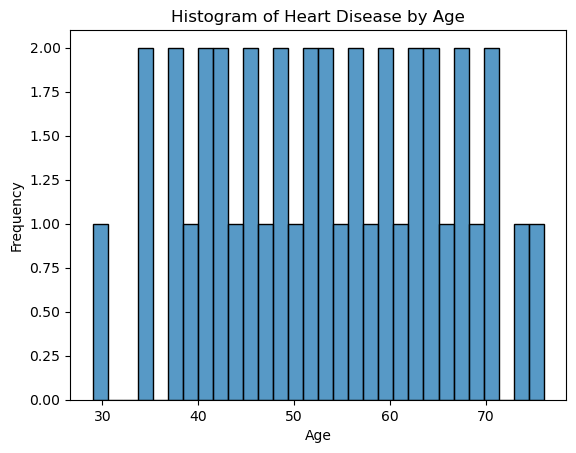

In [25]:
# Heart disease by age
disease_age = df[(df.target ==1)].groupby('age')['target'].count()

sns.histplot(data=disease_age, x='age', bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Heart Disease by Age')

plt.show()

## Heart disease is there for young age of 29

In [26]:
# Count of target for sex
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,92


In [27]:
# Heart disease by sex 
disease_sex = df[(df.target ==1)].groupby('sex')['target'].count()
disease_sex

sex
0    72
1    92
Name: target, dtype: int64

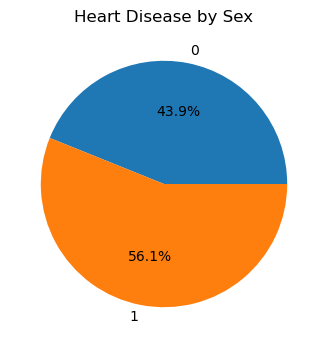

In [28]:
plt.figure(figsize=(4, 4))
plt.pie(disease_sex, labels=disease_sex.index, autopct='%1.1f%%')
plt.title('Heart Disease by Sex')
plt.show()

## 43.9% females and 56.1% males have heart disease

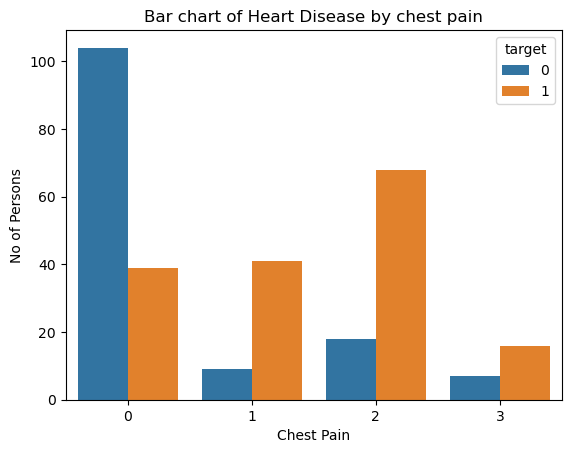

In [29]:
# Heart disease by chest pain
sns.countplot(x='cp',hue="target",data=df)
plt.xlabel('Chest Pain')
plt.ylabel('No of Persons')
plt.title('Bar chart of Heart Disease by chest pain')

plt.show()

## People with non-anginal pain had more heart attack

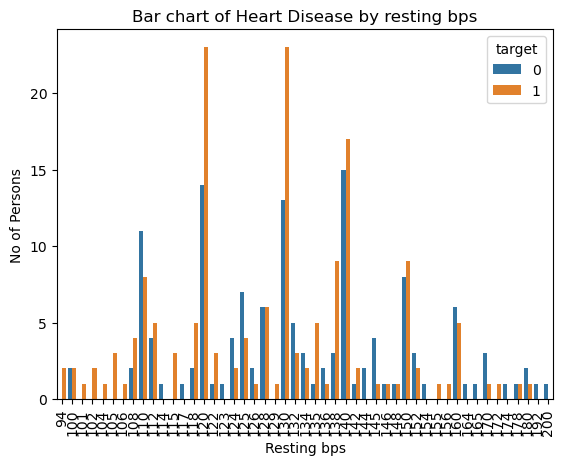

In [30]:
# Heart disease by resting bp
sns.countplot(x='trestbps',hue="target",data=df)
plt.xlabel('Resting bps')
plt.ylabel('No of Persons')
plt.title('Bar chart of Heart Disease by resting bps')
plt.xticks(rotation=90)
plt.show()

## patients with resting bps of 120, 130, 140  had more heart attack

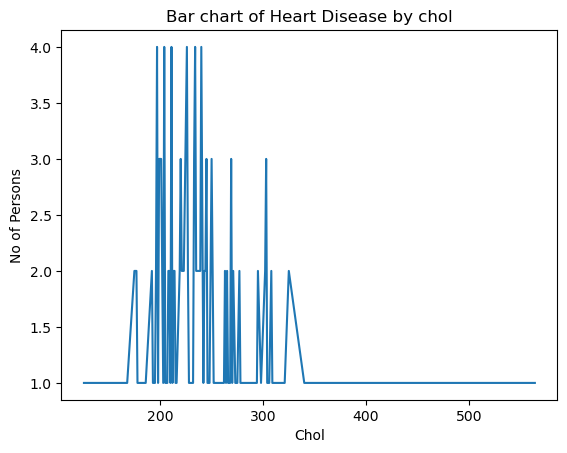

In [31]:
# Heart disease by chol
df[(df.target ==1)].groupby('chol')['target'].count().plot(kind='line')
plt.xlabel('Chol')
plt.ylabel('No of Persons')
plt.title('Bar chart of Heart Disease by chol')

plt.show()

## Patients with 200-300 chol had more heart attacks

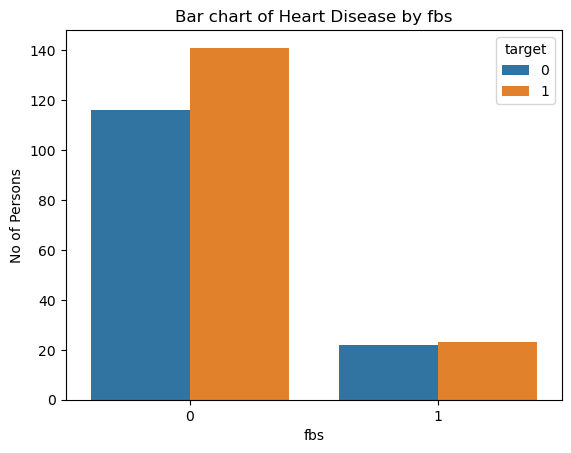

In [32]:
# Heart disease by fbs
sns.countplot(x='fbs',hue="target",data=df)
plt.xlabel('fbs')
plt.ylabel('No of Persons')
plt.title('Bar chart of Heart Disease by fbs')

plt.show()

## Patients with no diabetes had more heart attacks

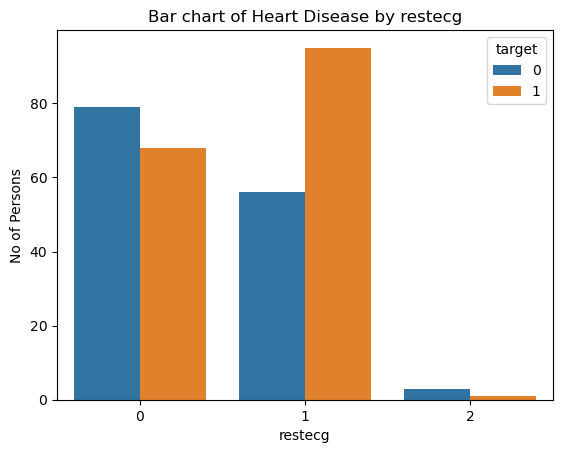

In [33]:
# Heart disease by restecg
sns.countplot(x='restecg',hue="target",data=df)
plt.xlabel('restecg')
plt.ylabel('No of Persons')
plt.title('Bar chart of Heart Disease by restecg')

plt.show()

## Patients withrestecg 1 and 0  had more heart attacks

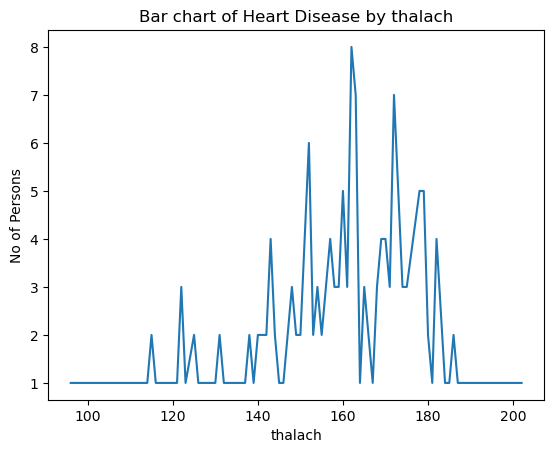

In [34]:
# Heart disease by thalach
df[(df.target ==1)].groupby('thalach')['target'].count().plot(kind='line')
plt.xlabel('thalach')
plt.ylabel('No of Persons')
plt.title('Bar chart of Heart Disease by thalach')

plt.show()

## Patients with thalach 140 -180 had more heart attacks

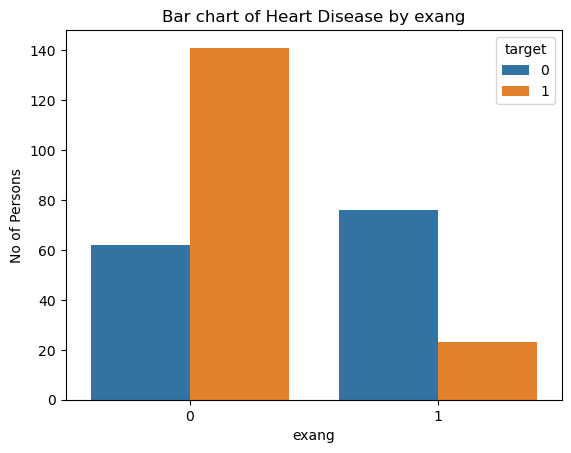

In [35]:
# Heart disease by exang
sns.countplot(x='exang',hue="target",data=df)
plt.xlabel('exang')
plt.ylabel('No of Persons')
plt.title('Bar chart of Heart Disease by exang')

plt.show()

## Patients with exang 0 had more heart attacks

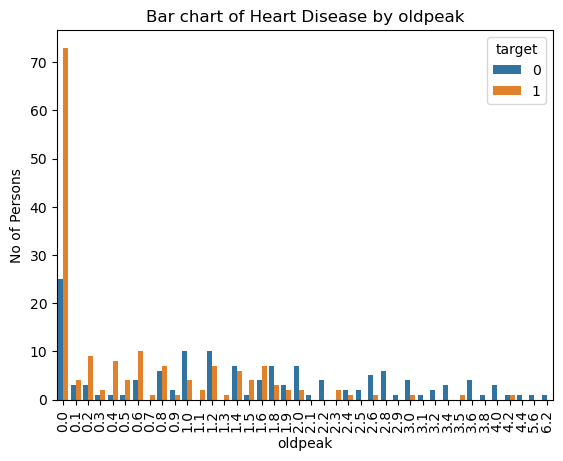

In [36]:
# Heart disease by oldpeak
sns.countplot(x='oldpeak',hue="target",data=df)
plt.xlabel('oldpeak')
plt.ylabel('No of Persons')
plt.title('Bar chart of Heart Disease by oldpeak')
plt.xticks(rotation=90)
plt.show()

## Patients with oldpeak 0 had more heart attacks

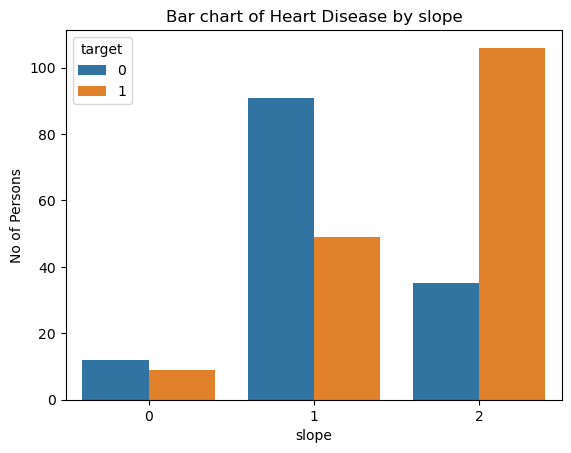

In [37]:
# Heart disease by slope
sns.countplot(x='slope',hue="target",data=df)
plt.xlabel('slope')
plt.ylabel('No of Persons')
plt.title('Bar chart of Heart Disease by slope')

plt.show()

## Patients with slope 2 and 1 had more heart attacks

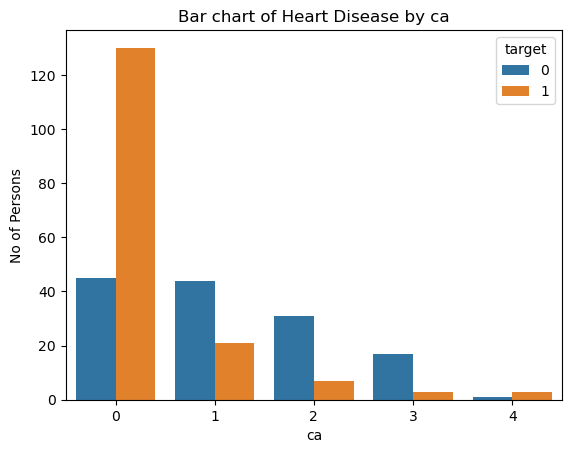

In [38]:
# Heart disease by ca
sns.countplot(x='ca',hue="target",data=df)
plt.xlabel('ca')
plt.ylabel('No of Persons')
plt.title('Bar chart of Heart Disease by ca')

plt.show()

## Patients with ca 0 had more heart attacks

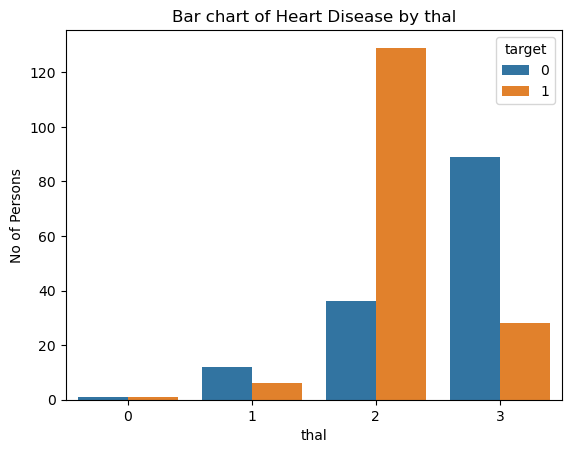

In [39]:
# Heart disease by thal
sns.countplot(x='thal',hue="target",data=df)
plt.xlabel('thal')
plt.ylabel('No of Persons')
plt.title('Bar chart of Heart Disease by thal')

plt.show()

## Patients with thal 2 had more heart attacks

# Model Building

In [40]:
# Data are in different scales, so we need to scale them before training the model
sc = StandardScaler()

#Scaling continuous variables
columns = ['age','trestbps','chol','thalach','oldpeak']
df[columns] = sc.fit_transform(df[columns])

X = df.drop('target', axis=1)
y = df[['target']]

In [41]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,2,-0.661712,-0.687083,0,0,-1.511859,0,0.394086,1,0,2
733,-1.153610,0,2,-1.346085,-2.041893,0,1,1.112172,0,-0.382092,1,0,2
739,-0.267966,1,0,-0.205463,0.164513,0,1,0.499898,1,-0.899544,2,1,3
843,0.506972,1,3,1.619532,0.512893,0,0,-1.074521,0,-0.899544,2,0,2


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### KNN

In [43]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_y_pred_train = knn.predict(X_train)
knn_y_pred_test = knn.predict(X_test)

### Naive Bayes

In [44]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_y_pred_train = nb.predict(X_train)
nb_y_pred_test = nb.predict(X_test)

### Decision Tree

In [45]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_y_pred_train = dt.predict(X_train)
dt_y_pred_test = dt.predict(X_test)

# Model Evaluation

### KNN

In [46]:
# Performance evaluation of training and testing data for KNN
print("KNN Model Performance: \n")
print("------------------Training Performance:----------------")

print("Accuracy        :", accuracy_score(y_train, knn_y_pred_train))
print("Precision       :", precision_score(y_train, knn_y_pred_train))
print("Recall          :", recall_score(y_train, knn_y_pred_train))
print("F1 Score        :", f1_score(y_train, knn_y_pred_train))
print("ROC AUC Score   :", roc_auc_score(y_train, knn_y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, knn_y_pred_train))
print("\nClassification Matrix :\n", classification_report(y_train, knn_y_pred_train))

print("------------------Testing Performance:----------------")

print("Accuracy        :", accuracy_score(y_test, knn_y_pred_test))
print("Precision       :", precision_score(y_test, knn_y_pred_test))
print("Recall          :", recall_score(y_test, knn_y_pred_test))
print("F1 Score        :", f1_score(y_test, knn_y_pred_test))
print("ROC AUC Score   :", roc_auc_score(y_test, knn_y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_y_pred_test))
print("\nClassification Matrix :\n", classification_report(y_test, knn_y_pred_test))

KNN Model Performance: 

------------------Training Performance:----------------
Accuracy        : 0.8625592417061612
Precision       : 0.84
Recall          : 0.9210526315789473
F1 Score        : 0.8786610878661089
ROC AUC Score   : 0.8574335322843192
Confusion Matrix:
 [[ 77  20]
 [  9 105]]

Classification Matrix :
               precision    recall  f1-score   support

           0       0.90      0.79      0.84        97
           1       0.84      0.92      0.88       114

    accuracy                           0.86       211
   macro avg       0.87      0.86      0.86       211
weighted avg       0.87      0.86      0.86       211

------------------Testing Performance:----------------
Accuracy        : 0.7362637362637363
Precision       : 0.7166666666666667
Recall          : 0.86
F1 Score        : 0.7818181818181817
ROC AUC Score   : 0.7226829268292683
Confusion Matrix:
 [[24 17]
 [ 7 43]]

Classification Matrix :
               precision    recall  f1-score   support

        

## Performing GridsearchCV for best value of K

In [47]:
param = {"n_neighbors": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
knn_cv = GridSearchCV(knn, param, cv=10, scoring='accuracy')
knn_cv.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy')

In [48]:
knn_cv.best_params_

{'n_neighbors': 17}

In [59]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
knn_y_pred_train = knn.predict(X_train)
knn_y_pred_test = knn.predict(X_test)

In [60]:
# Performance evaluation of training and testing data for KNN
print("KNN Model Performance: \n")
print("------------------Training Performance:----------------")

print("Accuracy        :", accuracy_score(y_train, knn_y_pred_train))
print("Precision       :", precision_score(y_train, knn_y_pred_train))
print("Recall          :", recall_score(y_train, knn_y_pred_train))
print("F1 Score        :", f1_score(y_train, knn_y_pred_train))
print("ROC AUC Score   :", roc_auc_score(y_train, knn_y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, knn_y_pred_train))
print("\nClassification Matrix :\n", classification_report(y_train, knn_y_pred_train))

print("------------------Testing Performance:----------------")

print("Accuracy        :", accuracy_score(y_test, knn_y_pred_test))
print("Precision       :", precision_score(y_test, knn_y_pred_test))
print("Recall          :", recall_score(y_test, knn_y_pred_test))
print("F1 Score        :", f1_score(y_test, knn_y_pred_test))
print("ROC AUC Score   :", roc_auc_score(y_test, knn_y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_y_pred_test))
print("\nClassification Matrix :\n", classification_report(y_test, knn_y_pred_test))

KNN Model Performance: 

------------------Training Performance:----------------
Accuracy        : 0.8308823529411765
Precision       : 0.7965116279069767
Recall          : 0.9256756756756757
F1 Score        : 0.8562500000000001
ROC AUC Score   : 0.8217088055797733
Confusion Matrix:
 [[ 89  35]
 [ 11 137]]

Classification Matrix :
               precision    recall  f1-score   support

           0       0.89      0.72      0.79       124
           1       0.80      0.93      0.86       148

    accuracy                           0.83       272
   macro avg       0.84      0.82      0.83       272
weighted avg       0.84      0.83      0.83       272

------------------Testing Performance:----------------
Accuracy        : 0.7666666666666667
Precision       : 0.7368421052631579
Recall          : 0.875
F1 Score        : 0.7999999999999999
ROC AUC Score   : 0.7589285714285714
Confusion Matrix:
 [[ 9  5]
 [ 2 14]]

Classification Matrix :
               precision    recall  f1-score   su

### Naive Bayes

In [51]:
# Performance evaluation of training and testing data for Naive Bayes
print("Naive Bayes Model Performance: \n")
print("------------------Training Performance:----------------")

print("Accuracy        :", accuracy_score(y_train, nb_y_pred_train))
print("Precision       :", precision_score(y_train, nb_y_pred_train))
print("Recall          :", recall_score(y_train, nb_y_pred_train))
print("F1 Score        :", f1_score(y_train, nb_y_pred_train))
print("ROC AUC Score   :", roc_auc_score(y_train, nb_y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, nb_y_pred_train))
print("\nClassification Matrix :\n", classification_report(y_train, nb_y_pred_train))

print("------------------Testing Performance:----------------")

print("Accuracy        :", accuracy_score(y_test, nb_y_pred_test))
print("Precision       :", precision_score(y_test, nb_y_pred_test))
print("Recall          :", recall_score(y_test, nb_y_pred_test))
print("F1 Score        :", f1_score(y_test, nb_y_pred_test))
print("ROC AUC Score   :", roc_auc_score(y_test, nb_y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_y_pred_test))
print("\nClassification Matrix :\n", classification_report(y_test, nb_y_pred_test))

Naive Bayes Model Performance: 

------------------Training Performance:----------------
Accuracy        : 0.8530805687203792
Precision       : 0.8608695652173913
Recall          : 0.868421052631579
F1 Score        : 0.8646288209606986
ROC AUC Score   : 0.8517362995116659
Confusion Matrix:
 [[81 16]
 [15 99]]

Classification Matrix :
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        97
           1       0.86      0.87      0.86       114

    accuracy                           0.85       211
   macro avg       0.85      0.85      0.85       211
weighted avg       0.85      0.85      0.85       211

------------------Testing Performance:----------------
Accuracy        : 0.7802197802197802
Precision       : 0.7884615384615384
Recall          : 0.82
F1 Score        : 0.803921568627451
ROC AUC Score   : 0.7758536585365853
Confusion Matrix:
 [[30 11]
 [ 9 41]]

Classification Matrix :
               precision    recall  f1-score   s

### Decision Tree

In [52]:
# Performance evaluation of training and testing data for Naive Bayes
print("Decision Tree Model Performance: \n")
print("------------------Training Performance:----------------")

print("Accuracy        :", accuracy_score(y_train, dt_y_pred_train))
print("Precision       :", precision_score(y_train, dt_y_pred_train))
print("Recall          :", recall_score(y_train, dt_y_pred_train))
print("F1 Score        :", f1_score(y_train, dt_y_pred_train))
print("ROC AUC Score   :", roc_auc_score(y_train, dt_y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, dt_y_pred_train))
print("\nClassification Matrix :\n", classification_report(y_train, dt_y_pred_train))

print("------------------Testing Performance:----------------")

print("Accuracy        :", accuracy_score(y_test, dt_y_pred_test))
print("Precision       :", precision_score(y_test, dt_y_pred_test))
print("Recall          :", recall_score(y_test, dt_y_pred_test))
print("F1 Score        :", f1_score(y_test, dt_y_pred_test))
print("ROC AUC Score   :", roc_auc_score(y_test, dt_y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_y_pred_test))
print("\nClassification Matrix :\n", classification_report(y_test, dt_y_pred_test))

Decision Tree Model Performance: 

------------------Training Performance:----------------
Accuracy        : 1.0
Precision       : 1.0
Recall          : 1.0
F1 Score        : 1.0
ROC AUC Score   : 1.0
Confusion Matrix:
 [[ 97   0]
 [  0 114]]

Classification Matrix :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       114

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

------------------Testing Performance:----------------
Accuracy        : 0.7252747252747253
Precision       : 0.7450980392156863
Recall          : 0.76
F1 Score        : 0.7524752475247525
ROC AUC Score   : 0.7214634146341463
Confusion Matrix:
 [[28 13]
 [12 38]]

Classification Matrix :
               precision    recall  f1-score   support

           0       0.70      0.68      0.69        41
     

## Cross Validation and Over-Fitting Check

In [53]:
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 42)

### KNN

In [54]:
# Checking if KNN Model is overfit or not
knn = KNeighborsClassifier(n_neighbors= 17)
knn.fit(X_train, y_train)

train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

if train_score > test_score:
    print("KNN Model is Overfitted")
    print("Train Score: ", train_score)
    print("Test Score: ", test_score)
else:
    print("KNN Model is not Overfitted")
    print("Train Score: ", train_score)
    print("Test Score: ", test_score)

KNN Model is Overfitted
Train Score:  0.8436018957345972
Test Score:  0.7692307692307693


In [55]:
# Since the KNN Model is overfitted, we will do k-fold cross validation test.
knn_score = cross_val_score(knn, X_test, y_test, cv=10)
knn_score

array([0.7       , 0.88888889, 0.88888889, 0.55555556, 0.88888889,
       0.77777778, 0.77777778, 0.66666667, 0.55555556, 0.77777778])

In [56]:
test_score = []
train_score = []

X = pd.DataFrame(X)
y = pd.DataFrame(y)

# Performing Cross Validation
for train_index, test_index in k_fold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn.fit(X_train,y_train)

    y_pred_test = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)

    accuracy_test = accuracy_score(y_pred_test, y_test)
    accuracy_train = accuracy_score(y_pred_train, y_train)

    test_score.append(accuracy_test)
    train_score.append(accuracy_train)

# Calculating and printing accuracy score of each training fold
print("Accuracy Score for each Fold in Training \n")
for fold, score in enumerate(train_score):
    print(f"Fold {fold+1} : {score}")

# Calculating and printing accuracy score of each testing fold
print("\nAccuracy Score for each Fold in Testing \n")
for fold, score in enumerate(test_score):
    print(f"Fold {fold+1} : {score}")

# Average Accuracy Score of Training Set
avg_accuracy_train = sum(train_score) / len(train_score)
print("\n Average Accuracy Train Score: ", avg_accuracy_train)

# Average Accuracy Score of Testing Set
avg_accuracy_test = sum(test_score) / len(test_score)
print("\n Average Accuracy Test Score: ", avg_accuracy_test)

Accuracy Score for each Fold in Training 

Fold 1 : 0.8302583025830258
Fold 2 : 0.8302583025830258
Fold 3 : 0.8272058823529411
Fold 4 : 0.8272058823529411
Fold 5 : 0.8272058823529411
Fold 6 : 0.8088235294117647
Fold 7 : 0.8345588235294118
Fold 8 : 0.8198529411764706
Fold 9 : 0.8161764705882353
Fold 10 : 0.8308823529411765

Accuracy Score for each Fold in Testing 

Fold 1 : 0.7741935483870968
Fold 2 : 0.7419354838709677
Fold 3 : 0.8
Fold 4 : 0.7333333333333333
Fold 5 : 0.8333333333333334
Fold 6 : 0.9
Fold 7 : 0.7333333333333333
Fold 8 : 0.8666666666666667
Fold 9 : 0.8666666666666667
Fold 10 : 0.7666666666666667

 Average Accuracy Train Score:  0.8252428369871934

 Average Accuracy Test Score:  0.8016129032258066


### Naive Bayes

In [57]:
# Checking if Naive Bayes Model is overfit or not
train_score = nb.score(X_train, y_train)
test_score = nb.score(X_test, y_test)

if train_score > test_score:
    print("Naive Bayes Model is Overfitted")
    print("Train Score: ", train_score)
    print("Test Score: ", test_score)
else:
    print("Naive Bayes Model is not Overfitted")
    print("Train Score: ", train_score)
    print("Test Score: ", test_score)

Naive Bayes Model is not Overfitted
Train Score:  0.8272058823529411
Test Score:  0.8666666666666667


### Decision Tree

In [58]:
# Checking if Decision Tree Model is overfit or not
train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)

if train_score > test_score:
    print("Decision Tree Model is Overfitted")
    print("Train Score: ", train_score)
    print("Test Score: ", test_score)
else:
    print("Decision Tree Model is not Overfitted")
    print("Train Score: ", train_score)
    print("Test Score: ", test_score)

Decision Tree Model is not Overfitted
Train Score:  0.9154411764705882
Test Score:  0.9333333333333333
